In [1]:
import numpy as np
from ROOT import TFile, TCanvas, TH2D

Welcome to JupyROOT 6.24/00


In [2]:
def get_hist(object, histkey):
    keys = histkey.split("_")
    syst = keys[1]

    #f = TFile.Open(f"Outputs/{object}/SkimSglEle__WP90__/fakerate_{syst}.root")
    f = TFile.Open(f"Outputs/{object}/fakerate_{syst}.root")
    h = f.Get(histkey)
    h.SetDirectory(0)
    f.Close()

    return h

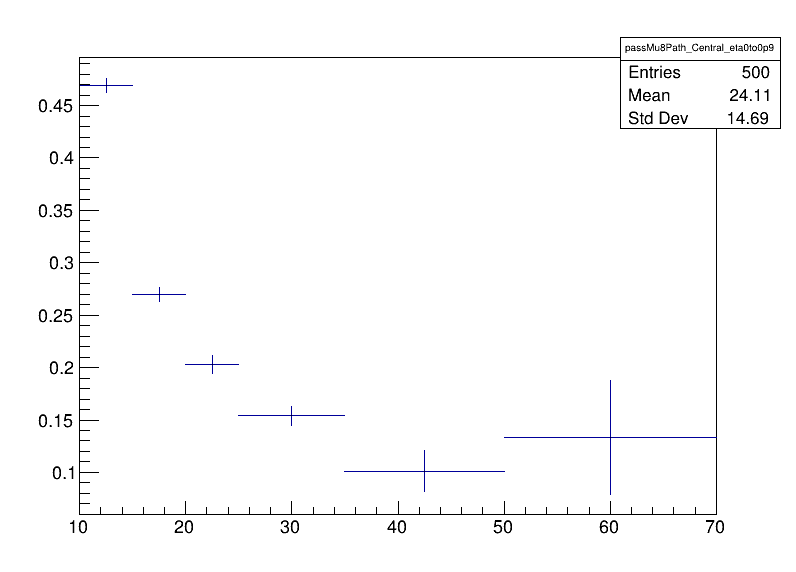

In [3]:
h = get_hist("muon", "passMu8Path_Central_eta0to0p9")
cvs = TCanvas("cvs", "cvs", 800, 600)
cvs.cd()
h.Draw()
cvs.Draw()

In [4]:
def get_fr(path, etabin):
    systs = ["Central", "FlavorDep", "JetPtCutUp", "JetPtCutDown", "JetEnUp", "JetEnDown", "JetResUp", "JetResDown", "ElectronEnUp", "ElectronEnDown", "ElectronResUp", "ElectronResDown", "MuonEnUp", "MuonEnDown"]

    # get central
    fr = dict()
    for syst in systs:
        fr[syst] = get_hist("muon", f"{path}_{syst}_{etabin}")

    fr_ele = fr["Central"].Clone(f"fakerate_muon_{path}_{syst}")

    for bin in range(1, fr_ele.GetNbinsX()+1):
        # get central
        error = np.power(fr_ele.GetBinError(bin), 2)
        central = fr_ele.GetBinContent(bin)
        for syst in systs:
            diff = central - fr[syst].GetBinContent(bin)
            # print(f"{bin}: [{syst}] {diff/central}")
            error += np.power(diff, 2)
        error = np.sqrt(error)
        fr_ele.SetBinError(bin, error)
    
    return fr_ele

In [11]:
def get_fakerate(etabin):
    fr_mu8path = get_fr("passMu8Path", etabin)
    fr_mu17path = get_fr("passMu17Path", etabin)
    #fr_ele23path = get_fr("passEle23Path", etabin)

    fr = fr_mu8path.Clone("fakerate_muon")
    for bin in range(1, fr.GetNbinsX()+1):
        if bin in [1, 2, 3]:
            fr.SetBinContent(bin, fr_mu8path.GetBinContent(bin))
            fr.SetBinError(bin, fr_mu8path.GetBinError(bin))
        else:
            fr.SetBinContent(bin, fr_mu17path.GetBinContent(bin))
            fr.SetBinError(bin, fr_mu17path.GetBinError(bin))
    return fr

[1]: 0.10604680122550154
[2]: 0.1431337932133013
[3]: 0.2152878247320148
[4]: 0.08871942421463182
[5]: 0.16370309494561638
[6]: 0.9555884436890641
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


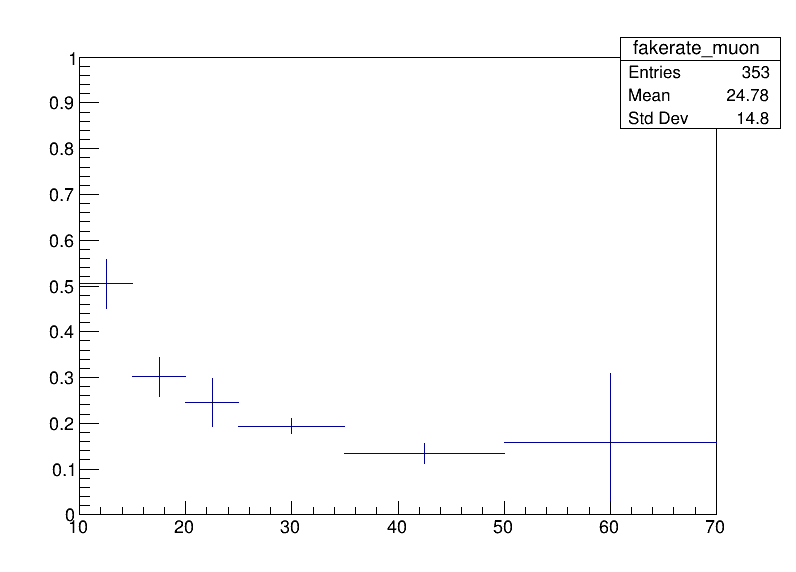

In [12]:
fr_ele = get_fakerate("eta0p9to1p6")
fr_ele.GetYaxis().SetRangeUser(0., 1.)
for bin in range(1, fr_ele.GetNbinsX()+1):
    print(f"[{bin}]: {fr_ele.GetBinError(bin)/fr_ele.GetBinContent(bin)}")
cvs = TCanvas("cvs", "cvs", 800, 600)
cvs.cd()
fr_ele.Draw()
cvs.Draw()




Warning in <TROOT::Append>: Replacing existing TH1: fakerate2D (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvs


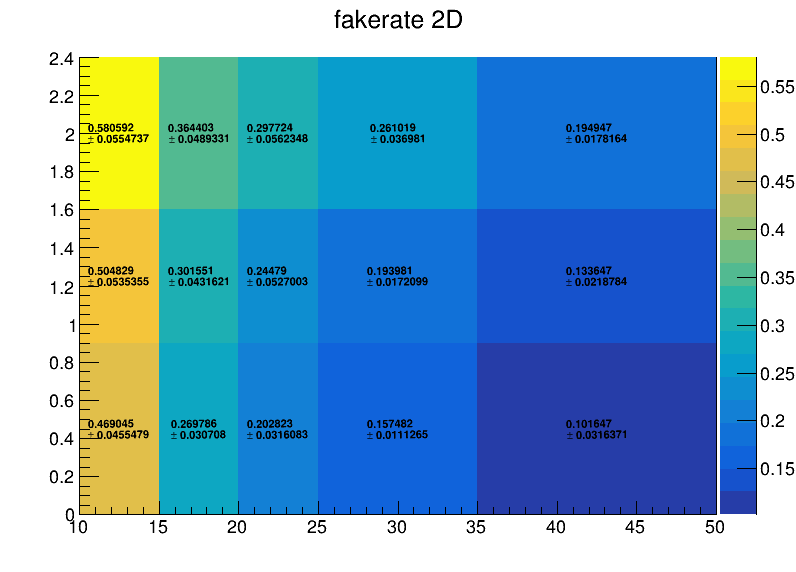

In [13]:
import array
xbins = array.array('d', [10, 15, 20, 25, 35, 50])
ybins = array.array('d', [0., 0.9, 1.6, 2.4])
fr_2d = TH2D("fakerate2D", "fakerate 2D", 5, xbins, 3, ybins)

fr_eta1 = get_fakerate("eta0to0p9")
for bin in range(1, fr_2d.GetNbinsX()+1):
    content = fr_eta1.GetBinContent(bin)
    error = fr_eta1.GetBinError(bin)
    fr_2d.SetBinContent(bin, 1, content)
    fr_2d.SetBinError(bin, 1, error)

fr_eta2 = get_fakerate("eta0p9to1p6")
for bin in range(1, fr_2d.GetNbinsX()+1):
    content = fr_eta2.GetBinContent(bin)
    error = fr_eta2.GetBinError(bin)
    fr_2d.SetBinContent(bin, 2, content)
    fr_2d.SetBinError(bin, 2, error)

fr_eta3 = get_fakerate("eta1p6to2p4")
for bin in range(1, fr_2d.GetNbinsX()+1):
    content = fr_eta3.GetBinContent(bin)
    error = fr_eta3.GetBinError(bin)
    fr_2d.SetBinContent(bin, 3, content)
    fr_2d.SetBinError(bin, 3, error)

fr_2d.SetStats(0)

cvs = TCanvas("cvs", "", 800, 600)
cvs.cd()
fr_2d.Draw("colz & text & e")
cvs.Draw()

out = TFile("fakerate_muon.root", "recreate")
out.cd()
fr_2d.Write()
out.Close()





